<a href="https://colab.research.google.com/github/simsekergun/Resolution/blob/main/notebooks/Resolution_mse_vs_N_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error

In [2]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_measured.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/datasets/Es_real.csv',header=None)
df_m.shape, df_r.shape

((2330, 110), (2330, 100))

In [3]:
df_mmax = max(df_m.max())
df_rmax = max(df_r.max())
X = df_m/df_mmax
y = df_r/df_rmax

In [4]:
df_mmax,df_rmax

(528.27, 470.16)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
X_train.shape, X_test.shape, y_train.shape

((1631, 110), (699, 110), (1631, 100))

In [6]:
Ns = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 275, 300, 350, 400, 450, 500, 550, 600, 1000, 1300, 1600]

In [7]:
mean_errors = np.zeros(len(Ns))
for i in range(len(Ns)):
  reg = LinearRegression()         # Instantiate
  reg.fit(X_train[:Ns[i]], y_train[:Ns[i]])        # Fit the train data
  y_pred = reg.predict(X_test)  
  mean_errors[i] = mean_squared_error(y_pred, y_test)

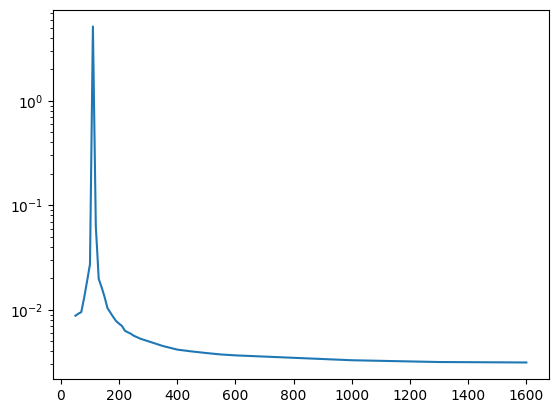

In [8]:
plt.plot(Ns,mean_errors)
plt.yscale("log")
plt.show()

In [9]:
mean_errors

array([8.78290632e-03, 9.19078251e-03, 9.50645297e-03, 1.30778865e-02,
       1.88309424e-02, 2.73959501e-02, 5.14647727e+00, 6.29747662e-02,
       1.97658710e-02, 1.64392601e-02, 1.33186823e-02, 1.04114232e-02,
       9.41548323e-03, 8.52933851e-03, 7.78580177e-03, 7.37293434e-03,
       6.99977227e-03, 6.30868149e-03, 6.09545952e-03, 5.91218796e-03,
       5.65762031e-03, 5.26693269e-03, 5.00659968e-03, 4.50808971e-03,
       4.16213807e-03, 3.99692965e-03, 3.85820795e-03, 3.73968117e-03,
       3.66521034e-03, 3.29219271e-03, 3.16564041e-03, 3.13411429e-03])